In [27]:
from utils import load_data
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(feature , labels) = load_data()
X_train , X_test , y_train , y_test = train_test_split( feature, labels , test_size = 0.1)

categories = ['daisy','dandelion','rose','sunflower','tulip']

In [35]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [50]:
def change_model(model, new_input_shape=(None, 40, 40, 3),custom_objects=None):
    # replace input shape of first layer
    
    config = model.layers[0].get_config()
    config['batch_input_shape']=new_input_shape
    model._layers[0]=model.layers[0].from_config(config)

    # rebuild model architecture by exporting and importing via json
    new_model = tf.keras.models.model_from_json(model.to_json(),custom_objects=custom_objects)

    # copy weights from old model to new one
    for layer in new_model._layers:
        try:
            layer.set_weights(model.get_layer(name=layer.name).get_weights())
            print("Loaded layer {}".format(layer.name))
        except:
            print("Could not transfer weights for layer {}".format(layer.name))

    return new_model

In [53]:
new_model = change_model(mobile,new_input_shape=(None, 128, 128, 3))

Loaded layer input_2
Loaded layer conv1_pad
Loaded layer conv1
Loaded layer conv1_bn
Loaded layer conv1_relu
Loaded layer conv_dw_1
Loaded layer conv_dw_1_bn
Loaded layer conv_dw_1_relu
Loaded layer conv_pw_1
Loaded layer conv_pw_1_bn
Loaded layer conv_pw_1_relu
Loaded layer conv_pad_2
Loaded layer conv_dw_2
Loaded layer conv_dw_2_bn
Loaded layer conv_dw_2_relu
Loaded layer conv_pw_2
Loaded layer conv_pw_2_bn
Loaded layer conv_pw_2_relu
Loaded layer conv_dw_3
Loaded layer conv_dw_3_bn
Loaded layer conv_dw_3_relu
Loaded layer conv_pw_3
Loaded layer conv_pw_3_bn
Loaded layer conv_pw_3_relu
Loaded layer conv_pad_4
Loaded layer conv_dw_4
Loaded layer conv_dw_4_bn
Loaded layer conv_dw_4_relu
Loaded layer conv_pw_4
Loaded layer conv_pw_4_bn
Loaded layer conv_pw_4_relu
Loaded layer conv_dw_5
Loaded layer conv_dw_5_bn
Loaded layer conv_dw_5_relu
Loaded layer conv_pw_5
Loaded layer conv_pw_5_bn
Loaded layer conv_pw_5_relu
Loaded layer conv_pad_6
Loaded layer conv_dw_6
Loaded layer conv_dw_6_bn


In [54]:
x = new_model.layers[-6].output
output =  tf.keras.layers.Dense(units = 5 , activation = 'softmax')(x)

In [56]:
model = tf.keras.Model(inputs=new_model.input , outputs = output)

In [57]:
for layers in model.layers[:-23]:
    layers.trainable = False

In [58]:
model.summary()

Model: "functional_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)       

In [61]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [65]:
history = model.fit(X_train, y_train ,validation_split=0.33, epochs=10 , verbose= 2)

Epoch 1/10
82/82 - 77s - loss: 0.0400 - accuracy: 0.9858 - val_loss: 0.0694 - val_accuracy: 0.9766
Epoch 2/10
82/82 - 82s - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 3/10
82/82 - 78s - loss: 0.0551 - accuracy: 0.9808 - val_loss: 0.1746 - val_accuracy: 0.9431
Epoch 4/10
82/82 - 79s - loss: 0.0361 - accuracy: 0.9881 - val_loss: 0.0532 - val_accuracy: 0.9813
Epoch 5/10
82/82 - 79s - loss: 0.0166 - accuracy: 0.9939 - val_loss: 0.0496 - val_accuracy: 0.9766
Epoch 6/10
82/82 - 91s - loss: 0.0459 - accuracy: 0.9850 - val_loss: 0.2083 - val_accuracy: 0.9330
Epoch 7/10
82/82 - 80s - loss: 0.0306 - accuracy: 0.9873 - val_loss: 0.2772 - val_accuracy: 0.9330
Epoch 8/10
82/82 - 80s - loss: 0.0250 - accuracy: 0.9916 - val_loss: 0.0578 - val_accuracy: 0.9759
Epoch 9/10
82/82 - 80s - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0729 - val_accuracy: 0.9798
Epoch 10/10
82/82 - 83s - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.1365 - val_accuracy: 0.9665


In [66]:
model.evaluate(X_test, y_test , verbose = 2)

14/14 - 5s - loss: 0.9141 - accuracy: 0.8614


[0.9141135811805725, 0.861431896686554]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


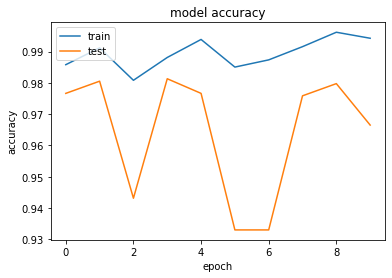

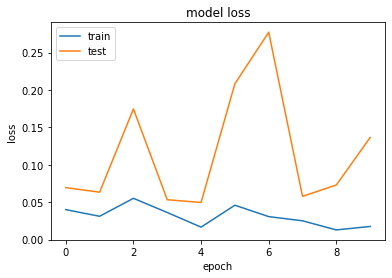

In [67]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

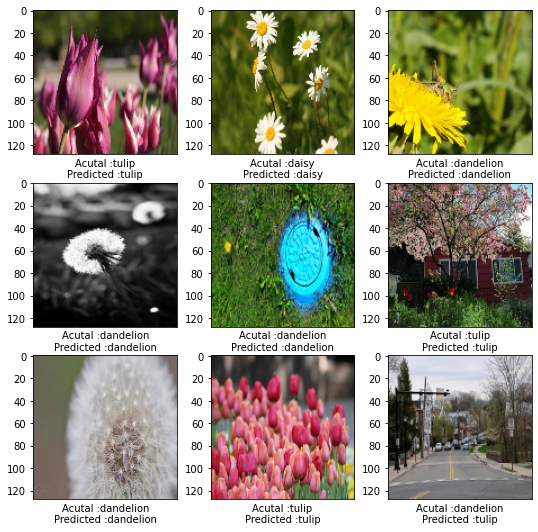

In [68]:
prediction = model.predict(X_test)

plt.figure(figsize = (9,9))

for i in range(9):
    plt.subplot(3,3 , i+1)
    plt.imshow(X_test[i])
    plt.xlabel('Acutal :' + categories[y_test[i]] + '\n' + 'Predicted :' + 
                categories[np.argmax(prediction[i])])
    plt.xticks([])

plt.show() 